We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
airline = pd.read_csv(r'/Users/abdulrahmanalabdali/Desktop/airlines_passengers.csv')
airline

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Let’s display the first five rows of data

In [35]:
airline.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [36]:
airline.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [37]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

The next thing we can do is convert the month column to an index. 


In [38]:
airline = airline.set_index('Month')
airline

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

Text(0, 0.5, 'Number of Passengers')

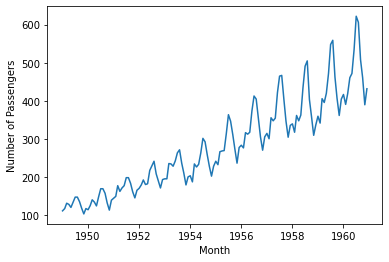

In [39]:
sns.lineplot(data=airline, x="Month", y="Passengers")
plt.ylabel("Number of Passengers")

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [41]:
X = airline.values
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Statistic: 0.815369
5% Critical Value: -2.88
p-value: 0.991880


Store our results in a dataframe display it

In [43]:
Result = pd.DataFrame(result)
Result

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


Explain the results

In [18]:
#Value of P = 0.99 , we reject H0 hypothesis

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

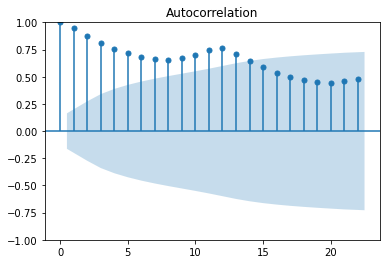

In [44]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(airline)
plt.show()

Calculate partial autocorrelation

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


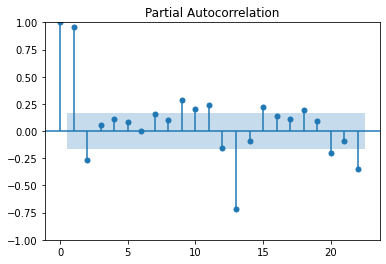

In [45]:
plot_pacf(airline)
plt.show()

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


In [47]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


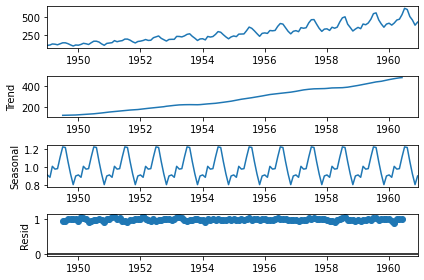

In [48]:
Decompose = seasonal_decompose(airline, model='multiplicative')
Decompose.plot()
plt.show()


Can you describe the charts?


In [ ]:
# There is increase in the trend throught the years, and it is seasonal

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [49]:
airline['Difference'] = airline['Passengers'].diff()

In [50]:
#Now check if the data is stationary 
result = adfuller(airline.Difference.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


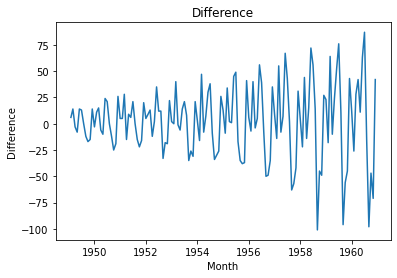

In [51]:
sns.lineplot(x=airline.index, y=airline.Difference)
plt.title('Difference')
plt.show()

In [53]:
from statsmodels.tsa.stattools import kpss

In [54]:
# Another Method:
result = kpss(airline.Difference)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

ValueError: cannot convert float NaN to integer

In [55]:
import numpy as np
airline['log'] = np.log(airline.Passengers)
airline['log'] = airline['log'].diff()
airline = airline.drop(airline.index[0])

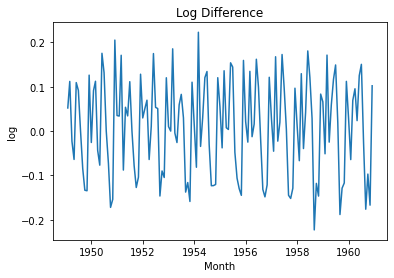

In [56]:
sns.lineplot(x=airline.index, y=airline.log)
plt.title('Log Difference')
plt.show()

In [57]:
airline.head()

,Passengers,Difference,log
Month,,,
1949-02-01,118,6.0,0.052186
1949-03-01,132,14.0,0.112117
1949-04-01,129,-3.0,-0.022990
1949-05-01,121,-8.0,-0.064022
1949-06-01,135,14.0,0.109484


In [58]:
#Now, stationarity using adfuller method
result = adfuller(df.log.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

AttributeError: 'DataFrame' object has no attribute 'log'

In [59]:
from scipy.stats import boxcox

airline['boxcox'],parameters= boxcox(airline['Passengers'])
airline['boxcox']=airline['boxcox'].diff()

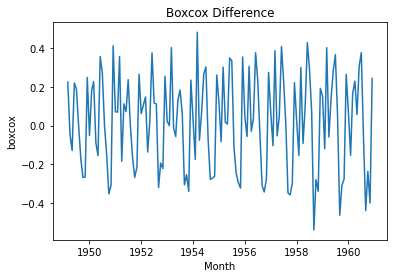

In [60]:
sns.lineplot(x=airline.index, y=airline.boxcox)
plt.title('Boxcox Difference')
plt.show()

In [61]:
result = adfuller(airline.boxcox.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.39
5% Critical Value: -2.88
p-value: 0.01


MA(1)

In [89]:
import statsmodels.api as sm
model_1 = sm.tsa.arima.ARIMA(airline.boxcox.dropna(), order=(0,1,0))
result_1 = model.fit()


/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [90]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -30.501
Date:                Wed, 28 Sep 2022   AIC                             63.002
Time:                        15:38:29   BIC                             65.951
Sample:                    03-01-1949   HQIC                            64.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0902      0.012      7.258      0.000       0.066       0.115
===================================================================================
Ljung-Box (L1) (Q):                  11.08   Jarque-Bera (JB):                 5.74
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.40   Skew:                             0.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

MA(2)

In [74]:
import statsmodels.api as sm
model_2 = sm.tsa.arima.ARIMA(airline.boxcox.dropna(), order=(0,2,0))
result_2 = model.fit()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [75]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -30.501
Date:                Wed, 28 Sep 2022   AIC                             63.002
Time:                        15:34:09   BIC                             65.951
Sample:                    03-01-1949   HQIC                            64.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0902      0.012      7.258      0.000       0.066       0.115
===================================================================================
Ljung-Box (L1) (Q):                  11.08   Jarque-Bera (JB):                 5.74
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.40   Skew:                             0.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AR(2)

In [78]:
model_3 = sm.tsa.arima.ARIMA(airline.boxcox.dropna(), order=(2,0,0))
result_3 = model.fit()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -30.501
Date:                Wed, 28 Sep 2022   AIC                             63.002
Time:                        15:36:26   BIC                             65.951
Sample:                    03-01-1949   HQIC                            64.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0902      0.012      7.258      0.000       0.066       0.115
===================================================================================
Ljung-Box (L1) (Q):                  11.08   Jarque-Bera (JB):                 5.74
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.40   Skew:                             0.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARMA (?,?)

In [80]:
model_4 = sm.tsa.arima.ARIMA(airline.boxcox.dropna(), order=(2,2,0))
result_4 = model.fit()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [82]:
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -30.501
Date:                Wed, 28 Sep 2022   AIC                             63.002
Time:                        15:36:31   BIC                             65.951
Sample:                    03-01-1949   HQIC                            64.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0902      0.012      7.258      0.000       0.066       0.115
===================================================================================
Ljung-Box (L1) (Q):                  11.08   Jarque-Bera (JB):                 5.74
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.40   Skew:                             0.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(?,?)

In [84]:
model_5 = sm.tsa.arima.ARIMA(airline.boxcox.dropna(), order=(2,1,0))
result_5 = model.fit()

/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abdulrahmanalabdali/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [85]:
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 boxcox   No. Observations:                  142
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -30.501
Date:                Wed, 28 Sep 2022   AIC                             63.002
Time:                        15:37:13   BIC                             65.951
Sample:                    03-01-1949   HQIC                            64.200
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0902      0.012      7.258      0.000       0.066       0.115
===================================================================================
Ljung-Box (L1) (Q):                  11.08   Jarque-Bera (JB):                 5.74
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.40   Skew:                             0.42
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [87]:
from statsmodels.tools.eval_measures import rmse
rmse_5 = rmse(airline.boxcox[-15:],model_5)
rmse_5

TypeError: unsupported operand type(s) for -: 'float' and 'ARIMA'

Calculate AIC

In [92]:
AIC1= result_1.aic
AIC2 =result_2.aic
AIC3 =result_3.aic
AIC4 =result_4.aic
AIC5 =result_5.aic

In [93]:
comparison_models = pd.DataFrame({'model': ['MA(1)','MA(2)', 'AR(2)', 'ARMA(2,2)','ARIMA(2,1,2)'],
                                  'RMSE': [rmse_1, rmse_2,rmse_3,rmse_4,rmse_5],'AIC': [AIC1, AIC2, AIC3, AIC4,AIC5]})

NameError: name 'rmse_1' is not defined